In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# np.random.seed(2017)   # 随机数种子

## 导入数据

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

- 我们来看看数据具体的图像

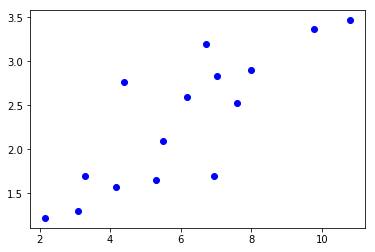

In [3]:
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

- 然后, 把数据转换成`tensorflow`的`tensor`形式

In [4]:
x = tf.constant(x_train, name='x')
y = tf.constant(y_train, name='y')

## 定义一个线性模型
- 定义模型的`w`以及`b`参数
- 用`w, b`定义这个线性模型

In [5]:
w = tf.Variable(initial_value=tf.random_normal(shape=(1,1)), dtype=tf.float32, name='weight')
b = tf.Variable(initial_value=0, dtype=tf.float32, name='biase')

with tf.variable_scope('Linear_Model'):
    y_pred = w * x + b

Instructions for updating:
Colocations handled automatically by placer.


注意`tf.variable_scope()`这个函数, 它是用来规定一个变量的`区域`的, 在这个`with`语句下定义的所有变量都在同一个`变量域`当中, `域名`就是`variable_scope()`的参数. 

那么它有什么用呢?

实际上, 所有变量域中的变量的名字都以域名为前缀:

In [6]:
print(w.name)
print(y_pred.name)

weight:0
Linear_Model/add:0


In [7]:
# 开启交互式会话
sess = tf.InteractiveSession()

# 一定要有初始化这一步!!!
sess.run(tf.global_variables_initializer())

好了, 现在我们可以看一下这个线性模型的输出具体长什么样了

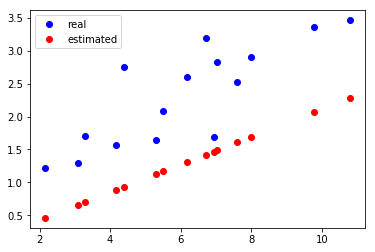

In [8]:
%matplotlib inline

# 要先将`tensor`的内容`fetch`出来
y_pred_numpy = y_pred.eval()

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

## 优化模型

- 定义误差函数

前面提到过, 为了优化我们的模型, 需要构建一个误差(`loss`)函数, 来告诉我们优化的好坏程度.

而这里, 我们想要预测值和真实值尽可能接近, 因此, 我们就用上面定义的`loss`进行衡量.

In [9]:
loss = tf.reduce_mean(tf.square(y - y_pred))

# 看看在当前模型下的误差有多少
print(loss.eval())

1.2624278


- 现在我们用梯度下降法去优化这个模型

首先我们需要求解误差函数对于每个参数的梯度. 通过求导知识可以知道是下面的形式:

$$
\frac{\partial}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i(w x_i + b - y_i) \\
\frac{\partial}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
$$

但实际上我们并不会这么去用, 因为`tensorflow`拥有自动求导功能, 省去了这些数学知识以及手工求导的复杂工作. 可以通过下面的代码去获得一个标量对参数的导函数

In [10]:
w_grad, b_grad = tf.gradients(loss, [w, b])

print('w_grad: %.4f' % w_grad.eval())
print('b_grad: %.4f' % b_grad.eval())

w_grad: -13.1429
b_grad: -2.0791


对梯度乘上一个`步长(lr)`来更新参数.一般我们把这个步长称为学习率

In [11]:
lr = 1e-2

w_update = w.assign_sub(lr * w_grad)
b_update = b.assign_sub(lr * b_grad)

sess.run([w_update, b_update])

[array([[0.34328926]], dtype=float32), 0.02079099]

在更新参数完成后, 我们再一次看看模型的输出结果

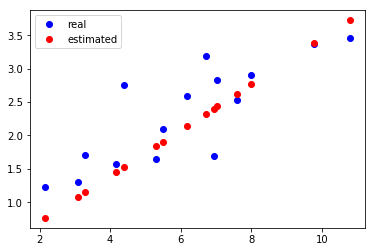

In [12]:
%matplotlib inline

y_pred_numpy = y_pred.eval(session=sess)

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

更新一次之后, 我们发现红色点跑到了蓝色点附近, 相比之前靠得更近了, 说明通过梯度下降模型得到了优化. 当然我们可以多更新几次

<IPython.core.display.Javascript object>


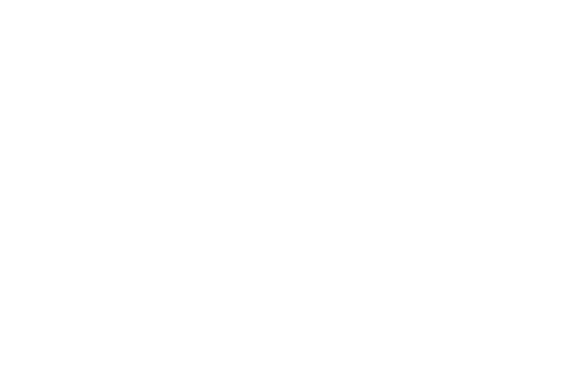

epoch: 0, loss: 0.3626185655593872
epoch: 1, loss: 0.2540731132030487
epoch: 2, loss: 0.25164592266082764
epoch: 3, loss: 0.2511846721172333
epoch: 4, loss: 0.2507619559764862
epoch: 5, loss: 0.25034210085868835
epoch: 6, loss: 0.2499244064092636
epoch: 7, loss: 0.249508798122406
epoch: 8, loss: 0.2490953952074051
epoch: 9, loss: 0.2486840933561325


<IPython.core.display.Javascript object>


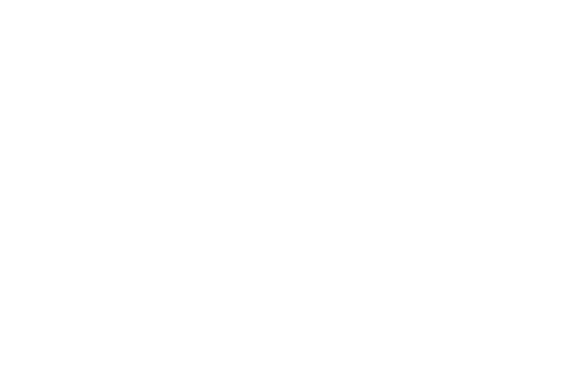

In [13]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()           # 打开交互模式

fig.show()
fig.canvas.draw()         # 更新显示

sess.run(tf.global_variables_initializer())

for e in range(10):
    sess.run([w_update, b_update])
    
    y_pred_numpy = y_pred.eval()
    loss_numpy = loss.eval()
    
    ax.clear()
    ax.plot(x_train, y_train, 'bo', label='real')
    ax.plot(x_train, y_pred_numpy, 'ro', label='estimated')
    ax.legend()
    fig.canvas.draw()
    plt.pause(0.5)
    
    print('epoch: {}, loss: {}'.format(e, loss_numpy))

再来看看最后的模型结果吧

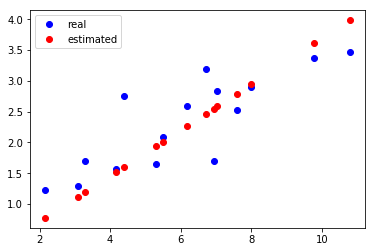

In [14]:
%matplotlib inline

plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

In [15]:
sess.close()

经过 10 次更新，我们发现红色的预测结果已经比较好的拟合了蓝色的真实值。

现在你已经学会了你的第一个机器学习模型了，再接再厉，完成下面的小练习。

**小练习：**

重启 notebook 运行上面的线性回归模型，但是改变训练次数以及不同的学习率进行尝试得到不同的结果

### 多项式回归（随机生成的函数用三次函数去拟合）

In [16]:
# 将之前的`graph`清除

tf.reset_default_graph()

In [17]:
# 定义一个多变量函数

w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


同样地, 我们看看这个多项式的图像

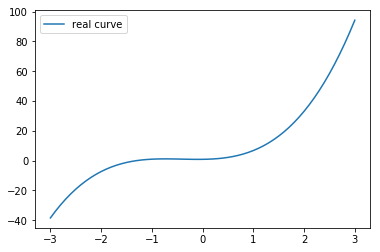

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

# 画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

首先我们构造形如$[x, x^{2}, x^{3}]$这样的数据, 把多项式回归问题转换为线性回归问题

In [19]:
x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1) 
#构造形如 [𝑥,𝑥2,𝑥3]    np.stack(x, axis=1):变成3个维度。np.stack(x, axis=0):变成2个维度
x_train = tf.constant(x_train, dtype=tf.float32, name='x_train')
y_train = tf.constant(y_sample, dtype=tf.float32, name='y_train')

构造线性模型

In [20]:
# 随机生成的函数
w = tf.Variable(initial_value=tf.random_normal(shape=(3, 1)), dtype=tf.float32, name='weights')
b = tf.Variable(initial_value=0, dtype=tf.float32, name='bias')

def multi_linear(x):
    return tf.squeeze(tf.matmul(x, w) + b)       # matmul乘法


y_ = multi_linear(x_train)


In [21]:
sess = tf.InteractiveSession()

画出模型输出的结果和真实结果的对比

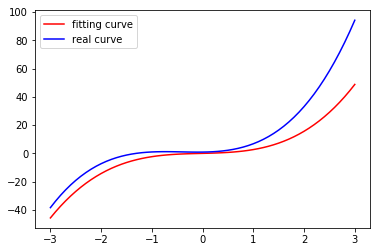

In [22]:
%matplotlib inline

sess.run(tf.global_variables_initializer())

x_train_value = x_train.eval()
y_train_value = y_train.eval()      # 基础值 ：三次函数
y_pred_value = y_.eval()           # 目标值

plt.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
plt.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
plt.legend()

同样地, 定义`loss`函数

In [23]:
loss = tf.reduce_mean(tf.square(y_train - y_))
loss_numpy = sess.run(loss)
print(loss_numpy)

209.92828


In [24]:
# 利用`tf.gradients()`自动求解导数
w_grad, b_grad = tf.gradients(loss, [w, b])

print(w_grad.eval())
print(b_grad.eval())

[[ -23.591988]
 [-103.37046 ]
 [-158.93788 ]]
-19.331455


In [25]:
# 利用梯度下降更新参数
lr = 1e-3

w_update = w.assign_sub(lr * w_grad)
b_update = b.assign_sub(lr * b_grad)

我们来看看更新一次之后的效果

Text(0.5, 1.0, 'loss: 176.2798')

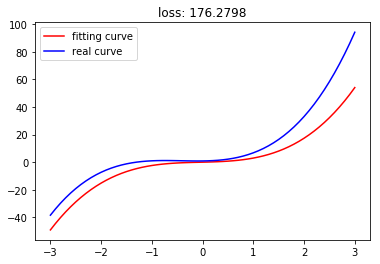

In [26]:
%matplotlib inline

sess.run([w_update, b_update])

x_train_value = x_train.eval(session=sess)
y_train_value = y_train.eval(session=sess)
y_pred_value = y_.eval(session=sess)
loss_numpy = loss.eval(session=sess)

plt.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
plt.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
plt.legend()
plt.title('loss: %.4f' % loss_numpy)

可以看到, 一次更新的效果并不好, 那让我们多尝试几次

<IPython.core.display.Javascript object>


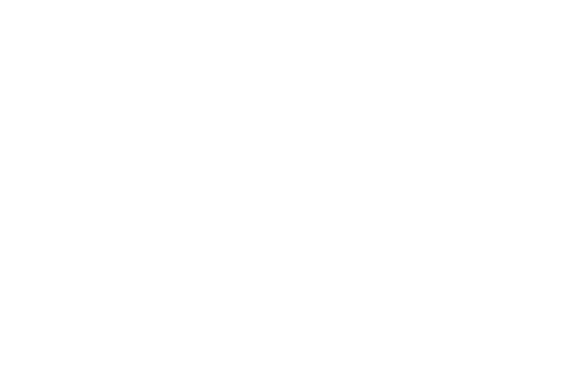

epoch: 20, loss: 13.819317817687988
epoch: 40, loss: 3.3766744136810303
epoch: 60, loss: 0.9350501894950867
epoch: 80, loss: 0.3600548803806305
epoch: 100, loss: 0.22087512910366058


<IPython.core.display.Javascript object>


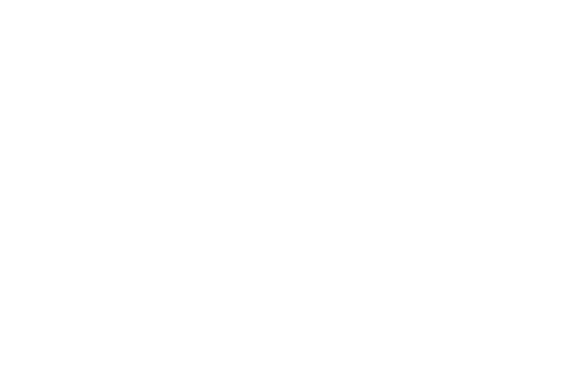

In [27]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

sess.run(tf.global_variables_initializer())

for e in range(100):  
    sess.run([w_update, b_update])
    
    x_train_value = x_train.eval()
    y_train_value = y_train.eval()
    y_pred_value = y_.eval()
    loss_numpy = loss.eval()

    ax.clear()
    ax.plot(x_train_value[:,0], y_pred_value, label='fitting curve', color='r')
    ax.plot(x_train_value[:,0], y_train_value, label='real curve', color='b')
    ax.legend()
    
    fig.canvas.draw()
    plt.pause(0.1)
    
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e + 1, loss_numpy))

可以看到，经过 100 次更新之后，可以看到拟合的线和真实的线已经完全重合了

**小练习：上面的例子是一个三次的多项式，尝试使用二次的多项式去拟合它，看看最后能做到多好**